<a href="https://colab.research.google.com/github/LaDiosaNegra/Kristal_Main/blob/main/LinearRegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = pd.get_dummies(df, drop_first=True)    #converts categorical columns into columns
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
df.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
df.dtypes


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
X = df.drop(['charges'], axis = 1) # Seprates dependent and independent variables
Y = df.charges
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Import the tool to scale data values between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X) # Use the scaler tool to change all the numbers in X to be between 0 and 1.
x = pd.DataFrame(scaled_data, columns = X.columns)

In [ ]:
x.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.505232,0.204783,0.242900,0.272048,0.242900
std,0.305434,0.164062,0.241099,0.500160,0.403694,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split  # a tool that helps split data into two parts
train_x, test_x, train_y, test_y = train_test_split(x, Y, test_size=0.2)  #  Split the data into training and testing sets :80% - training & 20% - testing.
train_x.shape, train_y.shape, test_x.shape, test_y.shape  # Check the sizes of the training and testing sets

((1070, 8), (1070,), (268, 8), (268,))

In [ ]:
train_x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
344,0.673913,0.686306,0.8,0.0,0.0,0.0,1.0,0.0
1020,0.717391,0.566048,0.0,1.0,0.0,0.0,0.0,1.0
930,0.173913,0.822437,0.2,1.0,0.0,0.0,1.0,0.0
1055,0.804348,0.314366,0.0,1.0,0.0,1.0,0.0,0.0
687,0.478261,0.692225,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
65,0.021739,0.348130,0.0,0.0,0.0,0.0,0.0,1.0
1036,0.086957,0.567931,0.4,1.0,1.0,0.0,1.0,0.0
793,0.760870,0.132903,0.0,1.0,1.0,0.0,1.0,0.0
353,0.326087,0.518832,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_y

344     10977.20630
1020     8798.59300
930      2927.06470
1055    10594.50155
687      5438.74910
           ...     
65       1743.21400
1036    37484.44930
793     21195.81800
353     12404.87910
1064     5708.86700
Name: charges, Length: 1070, dtype: float64

In [ ]:
test_x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1068,0.978261,0.153349,0.2,1.0,0.0,1.0,0.0,0.0
1152,0.543478,0.446597,0.6,0.0,1.0,0.0,1.0,0.0
894,0.956522,0.434490,0.0,1.0,0.0,0.0,0.0,0.0
674,0.565217,0.751412,0.4,0.0,1.0,0.0,1.0,0.0
702,0.760870,0.686306,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
280,0.478261,0.327146,0.2,0.0,1.0,0.0,0.0,0.0
630,0.760870,0.541835,0.2,1.0,0.0,0.0,0.0,1.0
835,0.521739,0.538337,0.4,1.0,0.0,0.0,1.0,0.0
67,0.478261,0.278585,0.2,1.0,0.0,1.0,0.0,0.0


In [ ]:
test_y

1068    14349.85440
1152    40941.28540
894     13555.00490
674     46200.98510
702      9504.31030
           ...     
280     22331.56680
630     10085.84600
835      7160.33030
67       6389.37785
469      2201.09710
Name: charges, Length: 268, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression  # helps the computer learn how to predict numbers
model = LinearRegression()  # creating a new, empty model that we'll teach how to make predictions
model.fit(train_x, train_y)   # teaching the model using our training data (train_x) and the correct answers (train_y)

LinearRegression()

In [ ]:
pred = model.predict(test_x)
pred

array([11899.09302931, 34467.44025022, 14655.12113127, 37916.2608507 ,
       14374.70256561, 12423.45786283, 31391.53732493, 27371.82947807,
       10216.81944365, 13030.4213237 , 10631.51103456, 11857.59288724,
       40422.73099961, 10019.23335971, 35407.23373434,  8398.77832902,
       33925.7216438 , 12837.78378933,  7481.07667889,  9097.30740172,
       13040.08044089, 11594.7320845 ,   715.29113563,  4182.94724367,
        6183.86601152, 24120.148201  , 13347.16927467,  6696.21865794,
        9690.86418405, 14837.25750735, 10845.69773381, 25674.96308418,
        6589.64674138, 40088.69416294, 34158.23054811, 23850.93028989,
       10801.82934986,  3406.49388819, 15827.24571257, 11457.87409903,
       15236.72392561, 28476.37756697, 24574.8245325 , 13453.25772867,
       10591.06992681, 28375.91985693, 12258.32626178,  3637.45772848,
       14493.38342603,  6248.99059252,  5046.78709778, 12224.57985972,
       30702.32974384, 18356.69236842,  5098.30395888, 10838.06030551,
      

In [ ]:
test_y

1068    14349.85440
1152    40941.28540
894     13555.00490
674     46200.98510
702      9504.31030
           ...     
280     22331.56680
630     10085.84600
835      7160.33030
67       6389.37785
469      2201.09710
Name: charges, Length: 268, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #  tools to measure how good the model is at predicting
import numpy as np

test_y_array = np.array(test_y)  # converting the test answers into an array
pred_array = np.array(pred) # converting the predicted charges into an array

mae = mean_absolute_error(test_y_array, pred_array) # finding out the average difference between predictions and the real answers
mse = mean_squared_error(test_y_array, pred_array)  # finding out the average of the squares of the differences between predictions and the real answers
rmse = np.sqrt(mse) # calculating the square root of the average squared error
r2 = r2_score(test_y_array, pred_array) # calculating how well the predictions match the actual values
print('MAE', mae)
print('MSE', mse)
print('RSME', rmse)
print('R2', r2)

MAE 4374.9433390752765
MSE 38754643.77330512
RSME 6225.322784667886
R2 0.7624474655803181


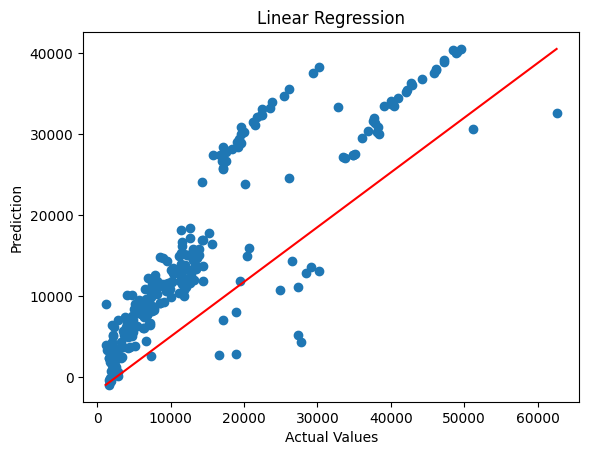

In [ ]:
plt.scatter(test_y, pred)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.plot([min(test_y), max(test_y)], [min(pred), max(pred)], c='red')
plt.show()

In [ ]:
residuals = test_y - pred
residuals

1068     2450.761371
1152     6473.845150
894     -1100.116231
674      8284.724249
702     -4870.392266
            ...     
280    -10000.888397
630     -3125.017880
835     -3484.189604
67      -1041.866191
469      1682.140179
Name: charges, Length: 268, dtype: float64

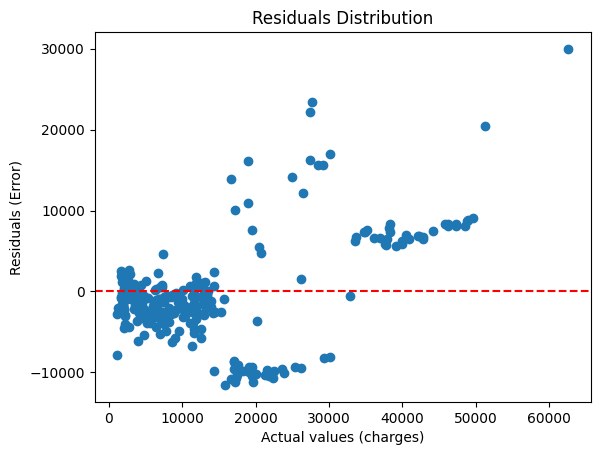

In [ ]:
plt.scatter(test_y, residuals)
plt.title('Residuals Distribution')
plt.xlabel('Actual values (charges)')
plt.ylabel('Residuals (Error)')
plt.axhline( y = 0, linestyle = 'dashed', c = 'red')